In [147]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive

In [279]:
a=0.05 #radius of coil
n= 100 #number of turns
em=1.76e11
L=1
c=1e14
slope=(16*a*c)/(3*em*(np.pi**3)*n**2)

In [280]:
def f(v,i):
    return (slope*v)/i


In [281]:
def pq(f):
    t1=(L+np.sqrt(L*L-4*L*f))/2
    t2=(L-np.sqrt(L*L-4*L*f))/2
    pair1=[t1,(L-t1)]
    #pair2=[t2,(L-t2)]
    return pair1 #[pair1,pair2]

1.732923e+11


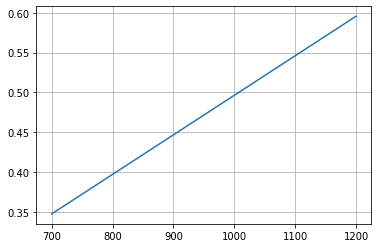

In [282]:

###################
times=4
y=[]
x=[]
for v in range(700,1300,100):
    su=0.0
    #print("|Voltage = ",v)
    #print("|  i         P              Q                 f              |")
    for i in range(11,11+times+1):
        temp=f(v,i)
        if (temp<(L/4.0)):

            st=pq(temp)
            #print("|",i,st[0],st[1],(st[0]*st[1])/L,"|")

            su+=i*i*(st[0]*st[1])/L
    #print("--------------------------------------------------------------")           
    su=su/(times**3)
    y.append(su)
    x.append(v)


plt.grid(True)
plt.plot(x,y)

slp=(y[4]-y[2])/(x[4]-x[2])
sol=(16*a*c)/(3*slp*(np.pi**3)*n**2)
sol="{:e}".format(sol)

print(sol)

In [311]:
def plott(v,i,p):
    figure, axes = plt.subplots()
    
    temp=f(v,i)
    st=pq(temp)
    q=L-p
    if(p<st[0]):
        r=(np.abs(p-st[1]))*a*0.5
    else: r=(np.abs(p-st[0]))*a*0.5
   
    
    if (temp<(L/4.0) and ((np.abs(st[0]-p) <0.01) or (np.abs(st[1]-p) <0.01))):
        t=plt.Circle(( 0,0), a/10,fill=True )
    else:
        t=plt.Circle(( 0,0), r,fill=False )
        
    plt.xlim((-a/2,a/2)) 
    plt.ylim((-a/2,a/2))
    
    axes.set_aspect( 1 )
    axes.add_artist( t)
    tite="P="+str(p)+"calc="+str(st[0])+","+str(st[1])
    
    plt.title( tite)
    plt.show()

In [312]:
interactivepl=interactive(plott,v=(700,1300,100),i=(1,20,1),p=(0.001,L,0.001))

In [313]:
interactivepl

interactive(children=(IntSlider(value=1000, description='v', max=1300, min=700, step=100), IntSlider(value=10,…